In [ ]:
# default_exp transfer_functions

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from importing_modules import *

In [ ]:
%matplotlib inline

------------------------

## Transfer Functions

It is crucial that you are able to describe your system in an efficient and useful manner.

- To do this, we describe the system mathematically. We do this by writing the equations of motion in the form of differential equations.
- We have seen how to model the simplified case of a car driving uphill.

The two most popular representations:
- state space representation 
- transfer functions. 

Loosely speaking, **transfer functions** are a Laplace domain representation of your system and they are commonly associated with the era of control techniques labeled classical control theory. 

**State space** is a time domain representation, packaged in matrix form, and they are commonly associated with the era labeled modern control theory.

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/16.ss-tf.png" alt="16.ss-tf" style="width: 800px;"/> </td>
</tr>
</table>

- Each representation has its own set of benefits and drawbacks and as a control engineer.
- We will focus on Transfer Functions.



## Definition of Transfer Function
> A transfer function is the Laplace transform of the impulse response of a linear, time-invariant system with a single input and single output when you set the initial conditions to zero. 

### The _s_ domain and the Laplace Transform

- The Laplace Transform takes the Fourier Transform one step forward
- Decomposes a time domain signal into both cosines and exponential functions
- For the Laplace transform we need a symbol that represents more than just frequency, $\omega$
- Need to also account for the exponential aspect of the signal. 
- This is where the variable $s$ comes in.

$s$ is a complex number, which means that it contains values for two dimensions:
- one dimension that describes the frequency of a cosine wave
- the second dimension that describes the exponential term. 

It is defined as $s = \sigma + j\omega$. 

Exponential functions that have imaginary exponents, such as $e^{j2t}$, produce two-dimensional sinusoids through Euler’s formula:

$$e^{j\omega t} = cos(\omega t) + jsin(\omega t)$$

For exponential functions that have **real** numbers for exponents:
- Negative real numbers give us exponentially decaying signals 
- Positive real numbers give us exponentially growing signals. 

Two examples are $e^{2t}$, which grows exponentially for all positive time, and $e^{−5t}$, which decays exponen- tially for all positive time.


Text(0.5, 0, 'time (s)')

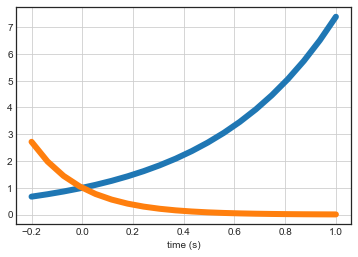

In [ ]:
fig = plt.figure()

t = np.linspace(-0.2, 1, 20)
plt.plot(t, np.exp(2*t), linewidth=6)
plt.plot(t, np.exp(-5*t), linewidth=6)
plt.grid()
plt.xlabel('time (s)')

Now let’s think about our new variable $s$ which has both a real and imaginary component. 

- The equation $e^{st}$ is really just an exponential function multiplied by a sinusoid

$$e^{st} = e^{(\sigma+j\omega} = e^{\sigma}e^{j\omega}$$

In [ ]:
import cmath

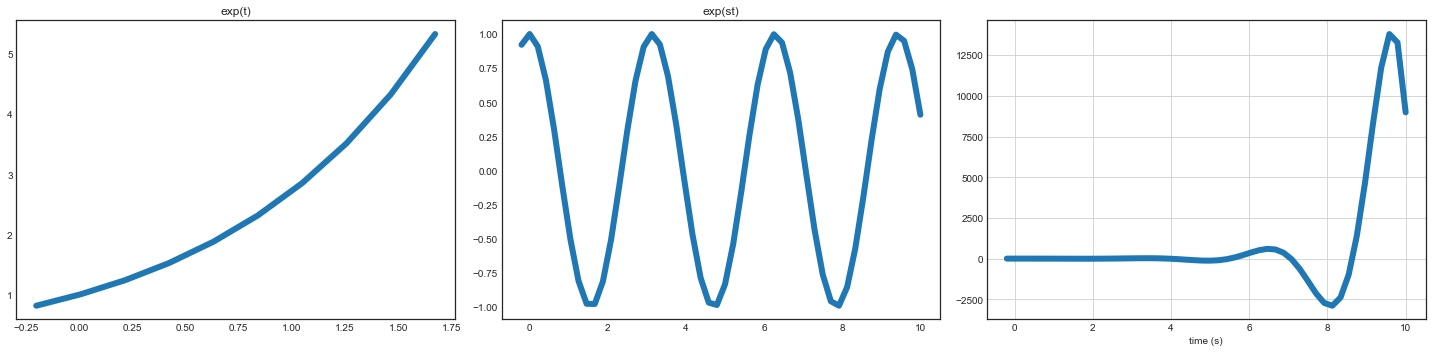

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,5))

t = np.linspace(-0.2, 10, 50)

# s = 1 + j2
s = complex(1, 2) 

axs[0].plot(t[:10], np.exp(t[:10]), linewidth=6); axs[0].set_title('exp(t)')
axs[1].plot(t, np.exp(complex(0,2)*t), linewidth=6); axs[1].set_title('exp(j2t)')
axs[2].plot(t, np.exp(t)*np.exp(complex(0,2)*t), linewidth=6); axs[2].set_title('exp(st)')

plt.grid()
plt.xlabel('time (s)')
fig.tight_layout()

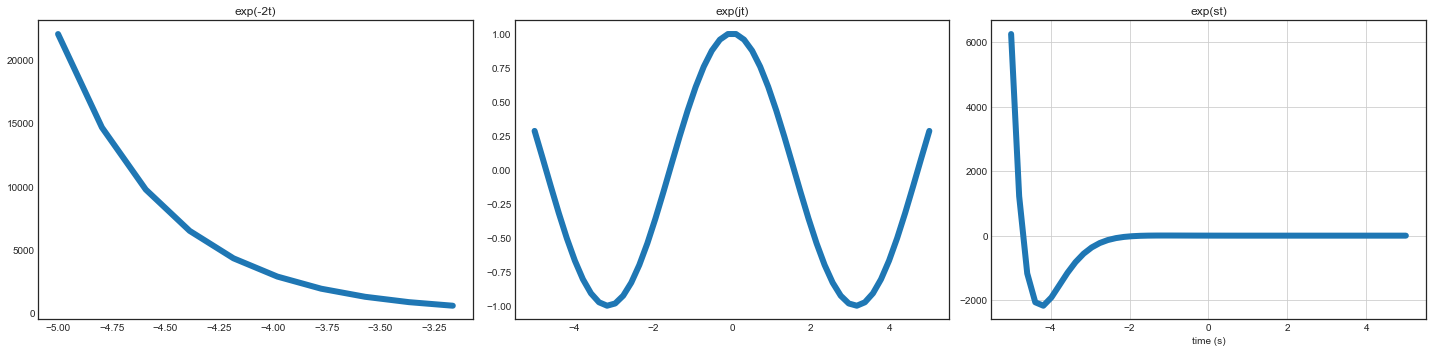

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,5))

t = np.linspace(-5, 5, 50)

# s = -2 + j
s = complex(-2, 1) 

axs[0].plot(t[:10], np.exp(-2*t[:10]), linewidth=6); axs[0].set_title('exp(-2t)')
axs[1].plot(t, np.exp(complex(0, 1)*t), linewidth=6); axs[1].set_title('exp(jt)')
axs[2].plot(t, np.exp(-2*t)*np.exp(complex(0, 1)*t), linewidth=6); axs[2].set_title('exp(st)')

plt.grid()
plt.xlabel('time (s)')
fig.tight_layout()

- We  can combine the two parts of $s = \sigma + j\omega$ into a two-dimensional plane where the real axis is the exponential line and the imaginary axis is the frequency line. 

- The value of $s$ provides a location in this plane and describes the resulting signal, $e^{st}$, as function of the selected $\omega$ and $\sigma$.

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/17.s-plane.png" alt="17.s-plane" style="width: 700px;"/> </td>
</tr>
</table>

--------------------------------

### The Laplace Transform

The Laplace transform is an integral transform that converts a function of a real variable 
$t$ (e.g., $time$) to a function of a complex variable $s = \sigma + j\omega \in \mathbb{C}$ (complex frequency). 


$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }f(t)e^{-st}\,dt.}$$


The inverse Laplace transform is:

$${\displaystyle f(t)={\mathcal {L}}^{-1}\{F(s)\}(t)={\frac {1}{2\pi j}}\lim _{\omega\to \infty }\int _{\sigma -j\omega}^{\sigma +j\omega}e^{st}F(s)\,ds}$$

The Laplace transform is particularly important because it is a tool for solving differential equations: _it transforms linear differential equations into algebraic equations, and convolution into multiplication!_

- Derivatives and integrals become algebric operations

From a system perspective, the Transfer function expresses the relation between the Laplace Transform of the input and that of the output:

$$ Y(s)=\mathbf{c}^T(s\mathbf{I}-\mathbf{A})^{-1} \mathbf{b} U(s) $$

--------------------

### Properties of the Laplace Transform: relationships between time and frequency

The Laplace transform has a number of properties. These are really useful to calculate the transforms without using its integral definition.


| Property | Time domain | Frequency domain (s) |
| ---------| --------------| --------------|
| Linearity | $af(t)$ + $bg(t)$ | $aF(s)+bG(s)$ | 
| Time shift (delay) | $f(t-\tau)$ | $e^{-\tau s}F(s)$
| Frequency shift | $f(t)e^{\alpha t}$ | $F(s-\alpha)$
| Derivative | $\frac{df}{dt}(t)$ | $sF(s)$ |
| Second Derivative | $\frac{df^2}{d^2t}(t)$ | $s^2F(s) - f(0^-)$ |
| Integral | $\int _{0}^{t}f(\tau )\,d\tau$ = $(u*f)(t)$ | $\frac{1}{s}F(s)$ |
| Convolution | $(f*g)(t)$ = $\int _{0}^{t} f(\tau )g(t$-$\tau )d\tau$ | $F(s)G(s)$ |
|  | $t\rightarrow\inf$ | $s\rightarrow 0$ |
|  | $t\rightarrow 0$ | $s\rightarrow \inf$ |


From this table it is easier to calculate Laplace transforms of known functions:

In [ ]:
t = np.linspace(-10,10,1000)

def step(t, step_time=0):
    """Heaviside step function"""
    return 1 * (t >= step_time) #np.ones((1,len(t))).squeeze()

def ramp(t):
    return t * (t >= 0)

def delta(t, delta_t=0, eps=None):
    if eps is None and len(t) > 1: 
        _eps=t[1]-t[0]
    else:
        _eps = eps
    return step(t, delta_t)-step(t, delta_t+_eps)

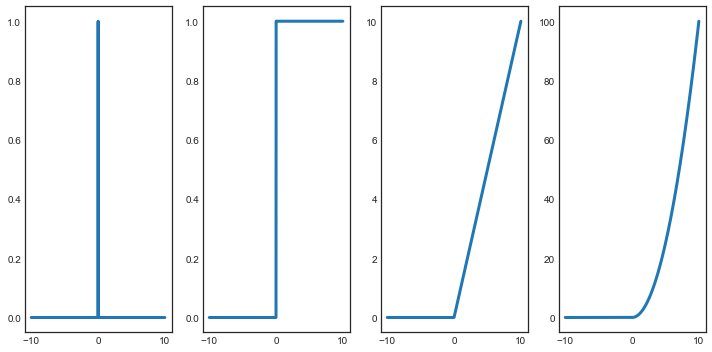

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10, 5))

axs[0].plot(t, delta(t), linewidth=3)
axs[1].plot(t, step(t), linewidth=3)
axs[2].plot(t, ramp(t), linewidth=3)
axs[3].plot(t, ramp(t)**2, linewidth=3)

fig.tight_layout()

Note that the `step` function is the derivative of the `ramp`, and that the `ramp` is the derivative of the `quadratic` function.

--------------------------------------------

### Transforms of known functions

### Delta function

If we then want to caculate the Laplace transform of the `delta` $\delta(t)$ function:

$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }\delta(t)e^{-st}\,dt.}$$

where

$$\delta(t)=0, \forall t \neq 0 $$
$$\int _{-\infty}^{\infty } \delta(t)dt=1$$

$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }\delta(t)e^{-st}\,dt.}=e^{-s0}=1$$

### Step function

Or of the `step` $1(t)$ function:

$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }1(t)e^{-st}\,dt.}$$

where

$$1(t)=0, \forall t < 0 $$
$$1(t)=1, \forall t \geq 0 $$


$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }1(t)e^{-st}\,dt.} = \int _{0}^{\infty}e^{-st}\,dt. = -\frac{e^{-st}}{s} \Bigg|^\infty_0 = -\frac{1}{s} \bigg( \lim_{t\rightarrow \infty} e^{-st} - \lim_{t\rightarrow 0} e^{-st} \bigg) = \frac{1}{s}$$



A great thing about working with linear systems is that usually we don’t have to perform the Laplace transform integration by hand.

Most the Laplace transforms for most functions that we will encounter have been solved many times and are available already collected into tables.

### Putting this all Together

Let's consider the rolling cart example:

<tr>
<td> <img src="img/18.rolling-cart.png" alt="18.rolling-cart" style="width: 700px;"/> </td>
</tr>



We can model this cart as:

$$m\ddot{x} = F_{input}(t) - F_{dumper}(t) - F_{spring}(t)$$

And since: $F_{spring}(t)=kx(t)$, $F_{dumper}(t)=b\dot{x}(t)$

We obtain:

$$m\ddot{x} + kx(t) + b\dot{x}(t) -  F_{input}(t) = 0$$

We can convert this system model into a transfer function:
- it’s a linear, 
- time-invariant system,
- there is a single input, $F_{input}$,
- and a single output, $x$. 

To calculate the Transfer Function we need to take the Laplace Transform of the impulse response of the system.

To do so, let's set our input to $F_{input}(t)=\delta(t)$ and solve for the response $x(t)$.


$$m\ddot{x} + kx(t) + b\dot{x}(t) -  \delta(t) = 0$$

- Solving linear, ordinary differential equations in the time domain can be time consuming. 
- We can make the task easier by taking the Laplace transform of the entire differential equation, one term at a time, and solve for the impulse response in the $s$ domain directly.
- Simply take each term and replace with the corresponding $s$ domain equivalent.

| | |
|---|---|
| time domain | $\large m\ddot{x} + kx(t) + b\dot{x}(t) -  \delta(t) = 0$ |
| $s$ domain  | $\large (ms^2 + bs + k)X(s) - 1 = 0 $|
| $X(s)$ is the impulse response in the $s$ domain  | $\large X(s) = \frac{1}{m*s^2 + bs + k}$|

*note that the initial conditions are zeros*

To go back to the time domain we could preform the inverse Laplace transform on $X(s)$.

------------------------------------

## Inverse Laplace Transform: Partial fraction decomposition

Given:

$$Y(s) = G(s)U(s) = \frac{N(s)}{D(s)}U(s)$$

We want to expand $G(s)$ into the sum of functions for which we already know the inverse transform, then thanks to the linearity we can simply sum them all up to obtain the inverse of the entire function:

Let's suppose we have all **distinct poles**:

$$ D(s) = \prod^{n}_{k=1}{(s-p_k)}$$

we want to find the coefficient $P_k$ such that:

$$ \frac{N(s)}{\prod^{n}_{k=1}{(s-p_k)}} = \sum^{n}_{k=1}\frac{P_k}{s-p_k}$$

Multiplying for $(s-p_i)$:

$$ (s-p_i)\frac{N(s)}{\prod^{n}_{k=1}{(s-p_k)}} = (s-p_i)\sum^{n}_{k=1}\frac{P_k}{s-p_k}$$

we can obtain:

$$P_i = [(s-p_i)G(s)] \big|_{s=p_i}$$

and finally:

$$ g(t) = \mathcal {L}^{-1}[G(s)]=\mathcal {L}^{-1} \bigg[\sum^{n}_{k=1}\frac{P_k}{s-p_k}\bigg] = \sum^{n}_{k=1} P_k e^{p_kt}$$

If we have **muliple poles** the decomposition is similar.

For example:

$$G(s) = \frac{s-10}{(s+2)(s+5)}$$


$$P_1=(s+2)\frac{s-10}{(s+2)(s+5)}\bigg|_{s=-2}=-\frac{12}{3}=-4$$
$$P_2=(s+5)\frac{s-10}{(s+2)(s+5)}\bigg|_{s=-5}=\frac{-15}{-3}=5$$

which means that:

$$G(s) = \frac{-4}{(s+2)} + \frac{5}{(s+5)}$$

and finally:

$$ g(t) = \mathcal {L}^{-1}[G(s)] = -4e^{-2t} + 5e^{-5t}$$

--------------------

### Some more on the Laplace transform

- Convert dfferential problems into algebric ones (finding the poles of the system)
- Makes it possible to understand the system output for a given input
- Using the transfer function it is possible to represent the input/output relationship
- Interconnected systems can be represented using block diagrams
- However, _it does not allow analysing the controllability and observability of each single block!_

--------------------

## [Sympy](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html)

The sympy Python module makes it easier to work with Laplace transforms. Let's import it:

In [ ]:
import sympy
sympy.init_printing()

# Let's also ignore some warnings here due to sympy using an old matplotlib function to render Latex equations.
import warnings
warnings.filterwarnings('ignore')

And let’s define the symbols with need to work with.

In [ ]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

Sympy provides a function called `laplace_transform` to easily calculate Laplace transforms:

For example, if we want to know the Laplace transform of $e^{\alpha t}$

In [ ]:
f = sympy.exp(a*t)
f

In [ ]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

We can define a function to make it easier:


In [ ]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [ ]:
L(f)

In [ ]:
invL(L(f))

where $\theta(t)$ is the name used by Sympy for the unit step function.

More transforms:

In [ ]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,  
         t**2,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

In [ ]:
Fs = [L(f) for f in functions]

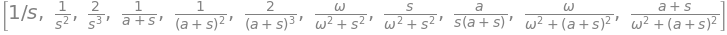

In [ ]:
Fs

------------------------------------------------------------

# Transfer function matrix

- We start from the state equations and use the derivate operator of $s$
- We also consider only the forced output of the system

$$\dot{x} = Ax + Bu;\; y = Cx$$

$$sX = AX + BU;\; Y = CX$$

$$(sI-A)X=BU;\; Y = CX$$

$$X = (sI-A)^{-1}BU;$$ $$Y = C(sI-A)^{-1}BU$$

Matrix $G(s)=C(sI-A)^{-1}B$ is the _Transfer Function Matrix_(or _Transfer Matrix_).

Each element of $G(s)$ expresses the **dynamic** relation (there is $s$) between an input channel and an output channel.

\begin{equation}
G(s)=
\begin{bmatrix}
g_{11}(s) & ... & g_{1m}(s)\\
... & ... & ... \\
g_{p1}(s) & ... & g_{pm}(s)
\end{bmatrix}
\end{equation}

$g_{ij}(s)$: Transfer function between $u_j$ and $y_i$, each  $g_{ij}(s)=\frac{N(s)}{D(s)}$

### Matrix transfer function and poles

$$G(s) = C(sI-A)^{-1}BU$$

- we need to calculate the inverse of a matrix:

$$A^{-1} = \frac{Adjugate(A)}{det(A)}$$

$$\Downarrow$$

$$G(s) = \frac{CAdjugate(sI-A)B}{det(sI-A)}$$



- Roots of the denominator of $G(s)$ (values of $s$ that make $den(G)=0$) are called _poles_ of the system.

- The poles of the system G(s) are, in general, a _subset_ of the roots of the eq. $det(sI-A)=0$

- which are the same as the roots of the characteristic equation: $det(A-\lambda I)=0$

- this means that the poles of the system are a subset of the eigenvalue of the matrix $A$.

## Transfer function, controllability and observability

- For each $g_{ij}s$, the poles of the T.F. are only the poles that are **controllable** from input $u_j$ and **observable** from the output $y$.

## Single Input, Single Output (SISO)

It is similar to what we had before, but now we only have one input and one output:

$$\dot{x} = Ax + bu;\; y = c^Tx$$

$$G(s) = c^T(sI-A)^{-1}b$$

Again, the transfer function only includes poles that are controllable and observable.

--------------------